C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ['FR' 0 3.5 ..., 0.0 0.0 0.0]
 ['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ..., 
 ['FR' 1 3.5 ..., 0.0 0.0 0.0]
 ['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ['FR' 1 3.5 ..., 0.0 0.0 0.0]]
10500 train samples
3150 test samples
171
Train on 10500 samples, validate on 3150 samples
Epoch 1/20
10500/10500 [==============================] - 2s - loss: 7.4924e-05 - acc: 0.3788 - val_loss: 3.6945e-05 - val_acc: 0.6584
Epoch 2/20
10500/10500 [==============================] - 1s - loss: 2.9540e-05 - acc: 0.4702 - val_loss: 3.4282e-05 - val_acc: 0.6435
Epoch 3/20
10500/10500 [==============================] - 1s - loss: 2.5081e-05 - acc: 0.3906 - val_loss: 3.0621e-05 - val_acc: 0.4165
Epoch 4/20
10500/10500 [==============================] - 1s - loss: 2.4605e-05 - acc: 0.3857 - val_loss: 3.4128e-05 - val_acc: 0.0187
Epoch 5/20
10500/10500 [==============================] - 1s - loss: 2.2742e-05 - acc: 0.3157 - val_loss: 3.0344e-05 - val_acc: 0.4467
Epoch 6/20
10500/10500 [================

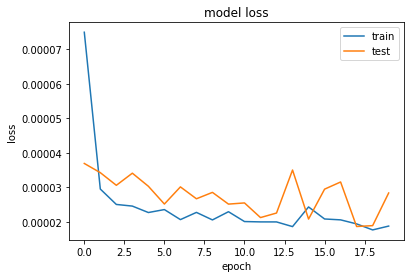

prediction length:  3150
mse length:  3150
      reconstruction_error  true_class
0                 0.000003           0
1                 0.000003           1
2                 0.000003           2
3                 0.000003           2
4                 0.000003           2
5                 0.000003           1
6                 0.000003           1
7                 0.000003           1
8                 0.000003           1
9                 0.000003           1
10                0.000003           0
11                0.000003           2
12                0.000003           1
13                0.000003           1
14                0.000003           1
15                0.000003           0
16                0.000003           2
17                0.000003           2
18                0.000003           0
19                0.000003           1
20                0.000003           1
21                0.000003           1
22                0.000003           1
23                0.0

,reconstruction_error,true_class
count,3.150000e+03,3150.000000
mean,3.204710e-06,1.000000
std,1.583506e-07,0.816626
min,2.935581e-06,0.000000
25%,3.080000e-06,0.000000
50%,3.108786e-06,1.000000
75%,3.406354e-06,2.000000
max,3.716666e-06,2.000000


In [18]:
#program to implement auto encoder for the given input data set

from __future__ import print_function
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Input
from keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical


np.random.seed(1671)
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 3
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT=0.3
RESHAPED = 171

#loading data from the given csv file
dataframe_train = pandas.read_csv("TrainingEdgesToAction.csv", header=None)
dataset_train_v = dataframe_train.values
dataset_train_f = dataset_train_v[1:,0:172]
#Shuffling of the data set
dataset_train_n = shuffle(dataset_train_f)
print(dataset_train_n)

X_train = dataset_train_n[0:,1:172].astype(float)
Y_train = dataset_train_n[0:,0]

dataframe_test = pandas.read_csv("TestingEdgesToAction.csv", header=None)
dataset_test = dataframe_test.values
dataset_test_ft = dataset_test[1:,0:172]
#Shuffling of the data set
dataset_test_nt = shuffle(dataset_test_ft)
X_test = dataset_test_nt[0:,1:172].astype(float)
Y_test = dataset_test_nt[0:,0]

#X_test = dataset_test[1:,1:172].astype(float)
#Y_test = dataset_test[1:,0]


X_train = X_train.reshape(10500,RESHAPED)
X_test = X_test.reshape(3150,RESHAPED)
X_train /= 255
X_test /= 255


print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')


#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(["Default", "LF", "FR"])
LabelEncoder()
list(le.classes_)
dummy_y_test_o=le.transform(Y_test)
dummy_y_train_o=le.transform(Y_train)

dummy_y_test=to_categorical(dummy_y_test_o)
dummy_y_train=to_categorical(dummy_y_train_o)



input_dim = X_train.shape[1]
print(input_dim)
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=NB_EPOCH,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

autoencoder = load_model('model.h5')

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()


predictions = autoencoder.predict(X_test)
print("prediction length: ",predictions.shape[0])

mse = np.mean(np.power(X_test - predictions, 2), axis=1)

print("mse length: ",mse.shape[0])
error_df = pandas.DataFrame({'reconstruction_error': mse,'true_class': dummy_y_test_o})
print(error_df)
error_df.describe()